In [1]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib notebook

csv_file = 'AAPL.csv'
aapl = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

In [5]:
start = dt.datetime(1999,1,1)
sp500= pdr.get_data_yahoo("^GSPC", start)

In [6]:
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-04,1248.810059,1219.099976,1229.229980,1228.099976,877000000,1228.099976
1999-01-05,1246.109985,1228.099976,1228.099976,1244.780029,775000000,1244.780029
1999-01-06,1272.500000,1244.780029,1244.780029,1272.339966,986900000,1272.339966
1999-01-07,1272.339966,1257.680054,1272.339966,1269.729980,863000000,1269.729980
1999-01-08,1278.239990,1261.819946,1269.729980,1275.089966,937800000,1275.089966


<IPython.core.display.Javascript object>


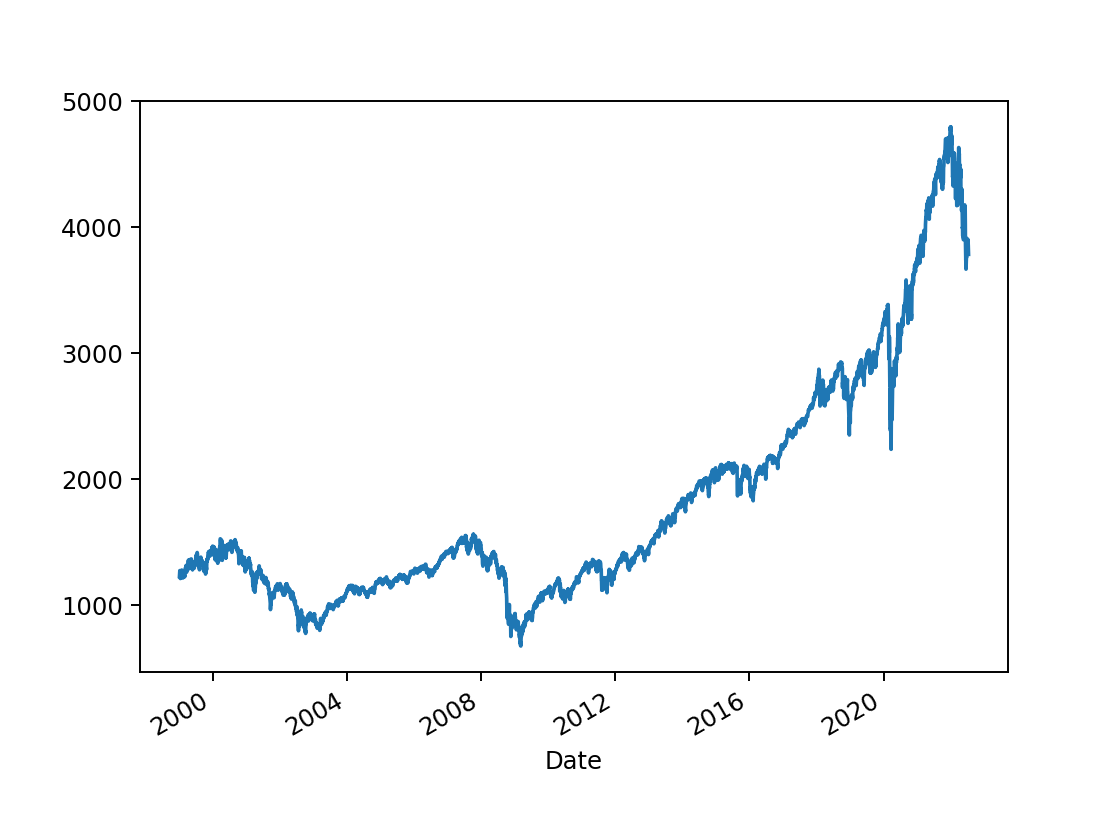

<AxesSubplot:xlabel='Date'>

In [7]:
fig, ax = plt.subplots()
sp500['Close'].plot(ax=ax)

<IPython.core.display.Javascript object>


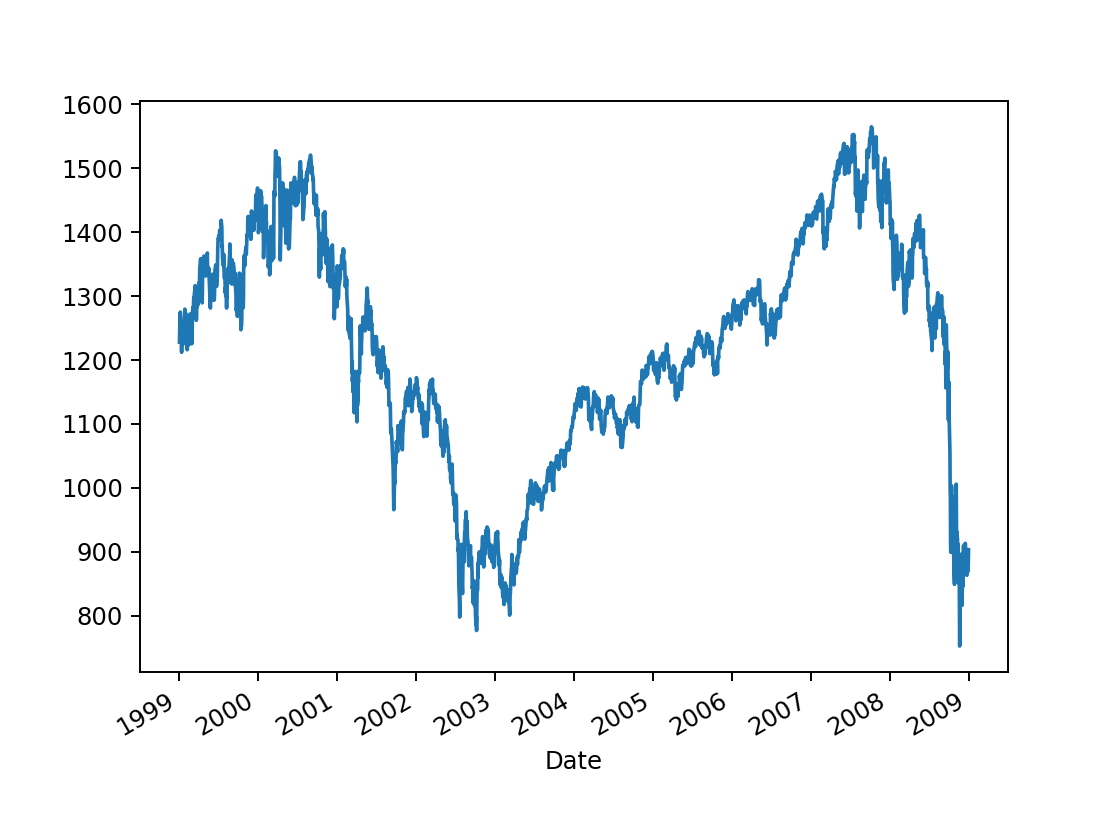

<AxesSubplot:xlabel='Date'>

In [9]:
fig, ax = plt.subplots()
sp500['Close'].loc[:'2009-01-01'].plot()

In [15]:
data = sp500['Close'].loc['1999':'2008']

In [13]:
total_return = data.iloc[-1] / data.iloc[0]
total_return

0.7354857242538836

In [14]:
#daily drawdown
rolling_max = data.cummax()
daily_drawdown = data / rolling_max - 1

#maximum drawdown
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.5192537515864695

### Calculate CAGR and Maximum Drawdown of S&P 500 from 2010 to 2020

In [16]:
data = sp500['Close'].loc['2010':'2019']
(data.iloc[-1] / data.iloc[0]) ** (1/10) -1

In [17]:
rolling_max = data.cummax()
daily_drawdown = data / rolling_max -1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.19778210435681998

In [19]:
start = dt.datetime(1999,1,1)
end = dt.datetime(2008,12,31)

data = pdr.get_data_yahoo("^GSPC", start, end)

In [20]:
data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())

In [21]:
data['Adj Close'].iloc[-1]/data['Adj Close'].iloc[0]

0.7354857242538836

In [22]:
data['Log returns'].sum()

-0.30722414870904974

In [23]:
np.exp(data['Log returns'].sum())

0.7354857242538831

In [24]:
data['Normalize'] = data['Adj Close'] / data['Adj Close'].iloc[0]

In [25]:
data['Exp sum'] = data['Log returns'].cumsum().apply(np.exp)

In [26]:
data[['Normalize', 'Exp sum']].tail()

,Normalize,Exp sum
Date,,
2008-12-24,0.706905,0.706905
2008-12-26,0.710691,0.710691
2008-12-29,0.707939,0.707939
2008-12-30,0.725218,0.725218
2008-12-31,0.735486,0.735486


### Volatility calculation

In [27]:
volatility = data['Log returns'].std()*(252**0.5)
volatility

0.21278321702789801

### Visualize the volatility of the S&P 500 index

In [29]:
#convert volatility into string
str_vol = str(round(volatility, 3)*100)

<IPython.core.display.Javascript object>


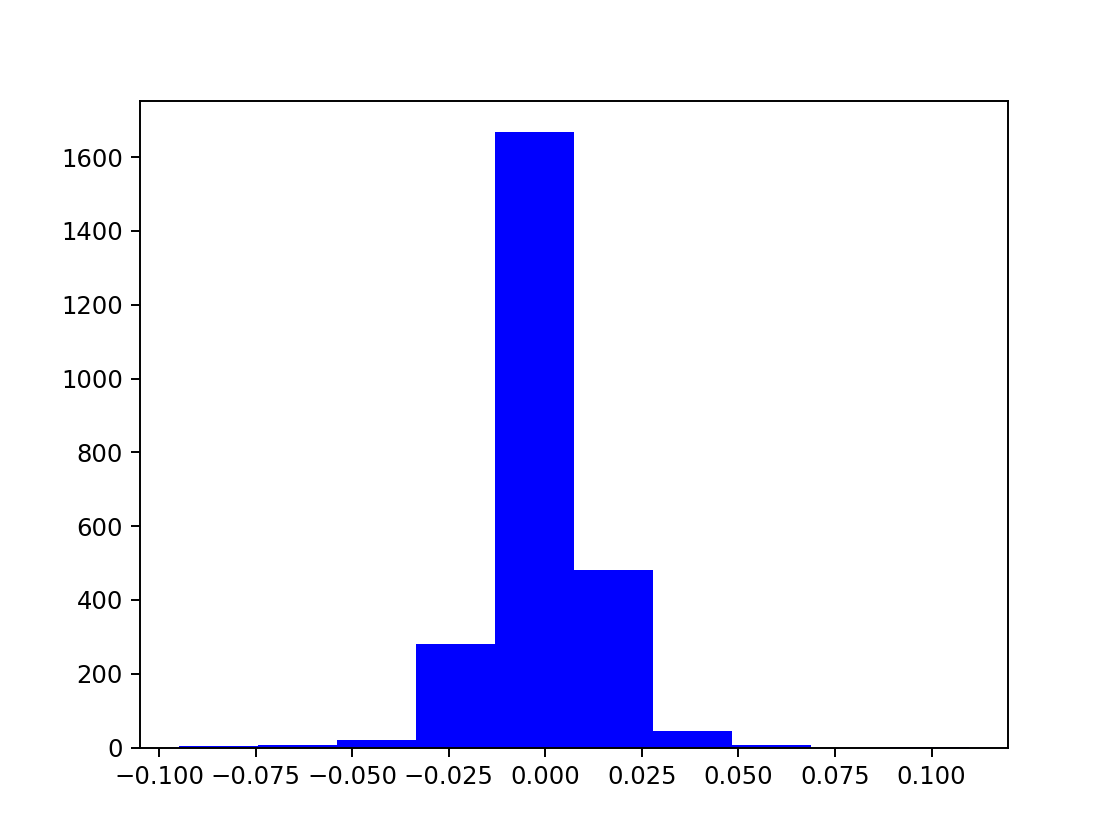

AttributeError: 'Rectangle' object has no property 'binx'

In [30]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, binx=50, alpha=0.6, color='b')
ax.set_xlabel("Log returns of stock price")
ax.set_ylabel("Frequency of log returns")
ax.set_title("Historic Volatility for S&P 500 (" + str_ +"%)")